# Soln 1

### 1(1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data =  pd.read_csv("train.csv")

In [3]:
data["SalePrice"].isnull().sum()

0

In [4]:
data["OverallQual"].isnull().sum()

0

In [5]:
x= data["OverallQual"].values
y=data["SalePrice"].values
n = len(x)
x = x.reshape(n,1)

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=.2 , random_state =1)

### scratch model 1(2)

In [7]:

meanx= np.mean(x_train)
meany= np.mean(y_train)
m= len(x_train)
numr ,denom = (0,0)
for i in range(m):
    numr += (x_train[i]-meanx)*(y_train[i]-meany)
    denom += (x_train[i]-meanx)**2

b1 = numr/denom
bo = meany - (b1*meanx)

In [8]:

predictions_test = [(b1*i + bo)  for i in x_test ]
predictions_train = [(b1*i + bo)  for i in x_train ]
n = len(predictions_test)

### 1(3)

In [9]:

mse=0
l = len(predictions_test)
for i in range(l):
    mse += (y_test[i]-predictions_test[i])**2

mse = mse /n
print(mse)





[2.42065146e+09]


### using scikit-learn 1(4)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
x_train=x_train.reshape(m,1)
y_train=y_train.reshape(m,1)
x_test=x_test.reshape(l,1)
y_test=y_test.reshape(l,1)


In [12]:
linear_model = LinearRegression()
linear_model = linear_model.fit(x_train,y_train)
y_predict_test = linear_model.predict(x_test)
y_predict_train = linear_model.predict(x_train)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict_test)

2420651458.8103285

### Plot 1 

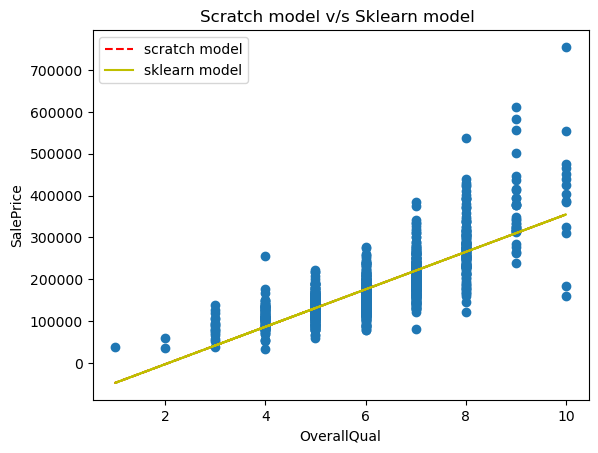

In [14]:
plt.scatter(x_train,y_train)
plt.plot(x_train,predictions_train , "r--" , label = "scratch model")
plt.plot(x_train,y_predict_train , "y-" , label = "sklearn model")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Scratch model v/s Sklearn model ")
plt.legend()
plt.show()

### Plot 2

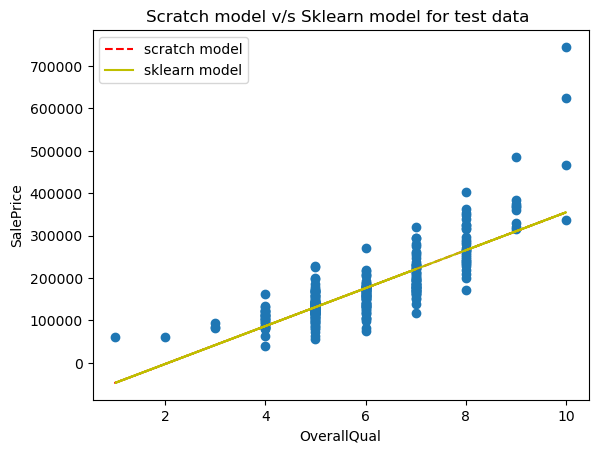

In [15]:

plt.scatter(x_test,y_test)
plt.plot(x_test,predictions_test , "r--" , label = "scratch model")
plt.plot(x_test,y_predict_test , "y-" , label = "sklearn model")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Scratch model v/s Sklearn model for test data ")
plt.legend()
plt.show()

# Soln 2

In [16]:
students_data = pd.read_csv("StudentsPerformance.csv")

In [17]:
students_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
students_data["PassedMath"] = students_data["math score"].apply(lambda x: 1 if x >= 50 else 0)

In [19]:
x = students_data["reading score"].values
y= students_data["PassedMath"].values
n =len(x)
x= x.reshape(n,1)

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=.2 , random_state =1)

### scratch model

In [21]:
x_train = x_train.T
y_train= y_train.reshape(1,x_train.shape[1])

x_test = x_test.T
y_test= y_test.reshape(1,x_test.shape[1])

In [22]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [23]:
def model (x,y,learning_rate , iterations):
    m=x.shape[1]         #no. of observations
    n=x.shape[0]          #np. of features

    w=np.zeros((n,1))
    b=0

    for i in range (iterations):
        z= np.dot(w.T , x)+b
        a= sigmoid(z)

        cost = (-1/m)*(y*np.log(a)+(1-y)*np.log(1-a))
        dw =(1/m)*np.dot(a-y , x.T)
        db = (1/m)*np.sum(a-y)

        w= w- learning_rate*dw.T
        b = b - learning_rate*db

    return w,b
    

In [24]:
w , b = model(x_train , y_train , 0.01 , 1000)

In [25]:
def outcome (x_test,y_test,w ,b):
    z= np.dot(w.T , x_test) + b 
    a= sigmoid(z)

    a= (a>=0.5).astype(int)
    a.reshape(a.shape[1],1)
    return a

In [26]:
a =outcome(x_test,y_test,w,b)

In [27]:
def accuracy(a, y_test):
    acc = (1-(np.sum(np.absolute(a-y_test))/y_test.shape[1]))*100
    print("The accuracy is ", acc," %")

accuracy(a,y_test)

The accuracy is  85.5  %


In [28]:
confussion_matrix= np.zeros((2,2))
a= a.flatten()
y_test=y_test.flatten()
for i in range(len(a)):
    if( a[i]==0 and y_test[i]==1):
        confussion_matrix[0][0] +=1
    if( a[i]==1 and  y_test[i]==0):
        confussion_matrix[0][1]+=1
    if( a[i]==0 and y_test[i]==1):
        confussion_matrix[1][0] +=1
    if (a[i]==1 and y_test[i]==1):
        confussion_matrix[1][1] +=1

print(confussion_matrix)

[[  0.  29.]
 [  0. 170.]]


### sklearn model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score


In [30]:
logistic_model = LogisticRegression()

In [31]:
x_train=x_train.T
y_train =y_train.reshape(x_train.shape[0])
x_test=x_test.T
y_test=y_test.reshape(x_test.shape[0])

logistic_model.fit(x_train,y_train)

LogisticRegression()

In [32]:
predictions_train = logistic_model.predict(x_train)
predictions_test = logistic_model.predict(x_test)

In [33]:
accuracy_score(y_test, predictions_test)*100

88.0

In [34]:
confusion_matrix(y_test,predictions_test)

array([[ 10,  20],
       [  4, 166]])

### 1(5)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
y_test = y_test.flatten()
a = np.round(a).flatten()
predictions_test= predictions_test.flatten()

In [37]:
acc_custom = accuracy_score(y_test,a)
prec_custom= precision_score(y_test,a)
rec_custom = recall_score(y_test,a)
f1_custom= f1_score(y_test,a)

acc_sklearn = accuracy_score(y_test,predictions_test)
prec_sklearn = precision_score(y_test, predictions_test)
rec_sklearn = recall_score(y_test, predictions_test)
f1_sklearn = f1_score(y_test, predictions_test)

In [38]:
print("Custom Model :")
print(f"Accuracy:  {acc_custom:.4f}")
print(f"Precision: {prec_custom:.4f}")
print(f"Recall:    {rec_custom:.4f}")
print(f"F1-Score:  {f1_custom:.4f}\n")

print("Sklearn Model:")
print(f"Accuracy:  {acc_sklearn:.4f}")
print(f"Precision: {prec_sklearn:.4f}")
print(f"Recall:    {rec_sklearn:.4f}")
print(f"F1-Score:  {f1_sklearn:.4f}")

Custom Model :
Accuracy:  0.8550
Precision: 0.8543
Recall:    1.0000
F1-Score:  0.9214

Sklearn Model:
Accuracy:  0.8800
Precision: 0.8925
Recall:    0.9765
F1-Score:  0.9326


In [39]:
print("Accuracy score of custom - sklearn = ", (acc_custom -acc_sklearn))
print("precission score of custom - sklearn = ", (prec_custom -prec_sklearn))
print("recall score of custom - sklearn = ", (rec_custom -rec_sklearn))
print("f1 score of custom - sklearn = ", (f1_custom -f1_sklearn))

Accuracy score of custom - sklearn =  -0.025000000000000022
precission score of custom - sklearn =  -0.038201761495650244
recall score of custom - sklearn =  0.02352941176470591
f1 score of custom - sklearn =  -0.011175055570780357
